<h1><b>Music Recommendation System Using Spotify Dataset</b></h1>


<h1>PART 1: DATASET DESCRIPTION</h1>

<h2>Problem Statement:</h2>

<p>The dataset used for this project is sourced from Kaggle and contains various attributes related to songs and their characteristics on the Spotify platform. The primary objective for this dataset is to build a recommendation engine that can analyze and understand the factors contributing to the popularity and user engagement of songs on Spotify. This recommendation engine aims to provide personalized song recommendations to users based on their preferences, ultimately enhancing the user experience on the platform.</p>
<h2>Source of the Dataset:</h2>

<p>The dataset was obtained from Kaggle, a well-known platform for sharing and discovering datasets. Kaggle sourced the data from Spotify, a popular music streaming service. Using data from Spotify ensures that the dataset contains real-world information about songs available on the platform, making it valuable for building a music recommendation system.</p>
<h2>Brief Description of the Dataset:</h2>

<p>The dataset obtained from Kaggle consists of information about songs available on Spotify. Each row in the dataset represents a unique song. The dataset comprises 14 columns, each representing different attributes or variables related to these songs.</p>
<h2>Description of the Attributes/Variables/Columns of the Dataset:</h2>

<ol>
  <li><strong>artists:</strong> This column contains the names of the artists associated with the songs. It is of data type object.</li>
  <li><strong>acousticness:</strong> This column represents the acousticness of the songs, measured as a float value. Acousticness refers to the extent to which a song is acoustic in nature, with values closer to 1 indicating a more acoustic sound.</li>
  <li><strong>danceability:</strong> This column represents the danceability of the songs, measured as a float value. Danceability indicates how suitable a song is for dancing, with higher values indicating songs that are easier to dance to.</li>
  <li><strong>energy:</strong> This column represents the energy level of the songs, measured as a float value. Energy indicates the intensity and activity of a song, with higher values indicating more energetic songs.</li>
  <li><strong>id:</strong> This column contains unique identifiers for the songs. It is of data type object.</li>
  <li><strong>instrumentalness:</strong> This column represents the instrumentalness of the songs, measured as a float value. Instrumentalness indicates the extent to which a song contains no vocals, with values closer to 1 indicating purely instrumental songs.</li>
  <li><strong>key:</strong> This column represents the key of the songs, measured as an integer. The key is a musical attribute that determines the overall pitch and tonality of a song.</li>
  <li><strong>liveness:</strong> This column represents the liveness of the songs, measured as a float value. Liveness indicates whether a song was recorded live, with higher values indicating a live recording.</li>
  <li><strong>loudness:</strong> This column represents the loudness of the songs, measured as a float value. Loudness refers to the overall volume of a song, with negative values indicating quieter songs.</li>
  <li><strong>mode:</strong> This column represents the mode of the songs, measured as a float value. Mode indicates whether a song is in a major or minor key.</li>
  <li><strong>name:</strong> This column contains the names of the songs. It is of data type object.</li>
  <li><strong>speechiness:</strong> This column represents the speechiness of the songs, measured as a float value. Speechiness indicates the presence of spoken words in a song, with higher values indicating more speech-like content.</li>
  <li><strong>tempo:</strong> This column represents the tempo (beats per minute) of the songs, measured as a float value.</li>
  <li><strong>valence:</strong> This column represents the valence of the songs, measured as a float value. Valence indicates the positivity or happiness of a song, with higher values indicating more positive or happy songs.</li>
</ol>

<h1>PART 2: DATA WRANGLING, PREPROCESSING AND TRANSFORMATION</h1>

In [13]:
import os
import numpy as np
import pandas as pd
import re

import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.metrics import euclidean_distances
from scipy.spatial.distance import cdist

import warnings
warnings.filterwarnings("ignore")

In [14]:
#TWO DATASETs OF SONGS

#Dataset Contains [Mostly English and Other Songs]
dataset1 = pd.read_csv("./data.csv")

#Dataset Contains the information of genres (Classification of different attributes of Audio Song into Respective genres)
genres = pd.read_csv("./data_by_genres.csv")

#Dataset Contains [Indian Songs]
dataset2 = pd.read_csv("./SingerAndSongs.csv")

genres.head()

,mode,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,1,21st century classical,0.979333,0.162883,1.602977e+05,0.071317,0.606834,0.361600,-31.514333,0.040567,75.336500,0.103783,27.833333,6
1,1,432hz,0.494780,0.299333,1.048887e+06,0.450678,0.477762,0.131000,-16.854000,0.076817,120.285667,0.221750,52.500000,5
2,1,8-bit,0.762000,0.712000,1.151770e+05,0.818000,0.876000,0.126000,-9.180000,0.047000,133.444000,0.975000,48.000000,7
3,1,[],0.651417,0.529093,2.328809e+05,0.419146,0.205309,0.218696,-12.288965,0.107872,112.857352,0.513604,20.859882,7
4,1,a cappella,0.676557,0.538961,1.906285e+05,0.316434,0.003003,0.172254,-12.479387,0.082851,112.110362,0.448249,45.820071,7


In [15]:
#As Dataset is huge (Fetching the desired sample by filtering on time and popularity)
#Filtering
dataset1 = dataset1[dataset1['year'] >= 2000]
dataset1 = dataset1[dataset1['popularity']>=60]

#Renaming Dataset2
dataset2 = dataset2.rename(columns={'Singer': 'artists', 'Song name': 'name'})

#Dropping Redundant Columns
dataset2= dataset2.drop(['track_href'], axis=1)

#Renaming Dataset1
dataset1 = dataset1[['artists','acousticness','danceability','energy','id','instrumentalness','key','liveness','loudness','mode','name','speechiness','tempo','valence']]

In [16]:
dataset1.head()

,artists,acousticness,danceability,energy,id,instrumentalness,key,liveness,loudness,mode,name,speechiness,tempo,valence
15606,['Coldplay'],0.00239,0.429,0.661,3AJwUDP919kvQ9QcozQPxg,0.000121,11,0.2340,-7.227,1,Yellow,0.0281,173.372,0.285
15607,['OutKast'],0.14300,0.843,0.806,0I3q5fE6wg7LIfHGngUTnV,0.000000,4,0.0771,-5.946,0,Ms. Jackson,0.2690,94.948,0.613
15608,['Linkin Park'],0.00958,0.556,0.864,60a0Rd6pjrkxjPbaKzXjfq,0.000000,3,0.2090,-5.870,0,In the End,0.0584,105.143,0.400
15609,['3 Doors Down'],0.00664,0.545,0.865,6ZOBP3NvffbU4SZcrnt1k6,0.000011,11,0.1680,-5.708,0,Kryptonite,0.0286,99.009,0.543
15610,['Eminem'],0.03020,0.949,0.661,3yfqSUWxFvZELEM4PmlwIR,0.000000,5,0.0454,-4.244,0,The Real Slim Shady,0.0572,104.504,0.760


<h6><b>Categorical Data : </b></h6>
<ul>
<li>Artists</li>
</ul>
<h6><b>Numerical Data : </b></h6>
<ul>
<li>Acousticness</li>
<li>energy</li>
<li>instrumentalness</li>
<li>key</li>
<li>liveness</li>
<li>loudness</li>
<li>mode</li>
<li>tempo</li>
<li>valence</li>
<li>danceability</li>
<li>Speechiness</li>
</ul>

<h6><b>Columns that do not participate in Analysis :</b></h6>
<ul>
<li>Song Name</li>
</ul>



In [17]:
songs = pd.concat([dataset1,dataset2],axis=0)

In [18]:

# Function to clean a single cell
def clean_cell(cell):
    return re.sub(r'[^a-zA-Z0-9\s]', '', cell) if isinstance(cell, str) else cell

# Apply the cleaning function to specific columns in the DataFrame
columns_to_clean = ['name', 'artists']
songs[columns_to_clean] = songs[columns_to_clean].applymap(clean_cell)


In [19]:
songs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16077 entries, 15606 to 2230
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artists           16077 non-null  object 
 1   acousticness      16077 non-null  float64
 2   danceability      16077 non-null  float64
 3   energy            16077 non-null  float64
 4   id                16077 non-null  object 
 5   instrumentalness  16077 non-null  float64
 6   key               16077 non-null  int64  
 7   liveness          16077 non-null  float64
 8   loudness          16077 non-null  float64
 9   mode              16077 non-null  int64  
 10  name              16076 non-null  object 
 11  speechiness       16077 non-null  float64
 12  tempo             16077 non-null  float64
 13  valence           16077 non-null  float64
dtypes: float64(9), int64(2), object(3)
memory usage: 1.8+ MB


<h1><b>1. Data cleaning:</b></h1>

In [20]:
print("helloe")

helloe


<h6>Missing Values</h6>

In [21]:
#Missing Values
missing_values = songs.isnull().sum()
print(missing_values)

artists             0
acousticness        0
danceability        0
energy              0
id                  0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
name                1
speechiness         0
tempo               0
valence             0
dtype: int64


In [22]:
# As the count for missing value is only ONE (The Most Suitable technique to remove nulls is to remove the entire row)
songs= songs.dropna()
missing_values = songs.isnull().sum()
print(missing_values)
songs.info()

artists             0
acousticness        0
danceability        0
energy              0
id                  0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
name                0
speechiness         0
tempo               0
valence             0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 16076 entries, 15606 to 2230
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artists           16076 non-null  object 
 1   acousticness      16076 non-null  float64
 2   danceability      16076 non-null  float64
 3   energy            16076 non-null  float64
 4   id                16076 non-null  object 
 5   instrumentalness  16076 non-null  float64
 6   key               16076 non-null  int64  
 7   liveness          16076 non-null  float64
 8   loudness          16076 non-null  float64
 9   mode              16076 non-null  int64  
 10

<h6>Duplicate Values</h6>

In [23]:
#Removing the Duplicates
songs = songs.drop_duplicates()
songs = songs.reset_index()
songs.head()
songs.to_csv("songs.csv")

In [24]:
songs.head()

,index,artists,acousticness,danceability,energy,id,instrumentalness,key,liveness,loudness,mode,name,speechiness,tempo,valence
0,15606,Coldplay,0.00239,0.429,0.661,3AJwUDP919kvQ9QcozQPxg,0.000121,11,0.2340,-7.227,1,Yellow,0.0281,173.372,0.285
1,15607,OutKast,0.14300,0.843,0.806,0I3q5fE6wg7LIfHGngUTnV,0.000000,4,0.0771,-5.946,0,Ms Jackson,0.2690,94.948,0.613
2,15608,Linkin Park,0.00958,0.556,0.864,60a0Rd6pjrkxjPbaKzXjfq,0.000000,3,0.2090,-5.870,0,In the End,0.0584,105.143,0.400
3,15609,3 Doors Down,0.00664,0.545,0.865,6ZOBP3NvffbU4SZcrnt1k6,0.000011,11,0.1680,-5.708,0,Kryptonite,0.0286,99.009,0.543
4,15610,Eminem,0.03020,0.949,0.661,3yfqSUWxFvZELEM4PmlwIR,0.000000,5,0.0454,-4.244,0,The Real Slim Shady,0.0572,104.504,0.760


In [25]:
songs.info()
songs['artists'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16012 entries, 0 to 16011
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   index             16012 non-null  int64  
 1   artists           16012 non-null  object 
 2   acousticness      16012 non-null  float64
 3   danceability      16012 non-null  float64
 4   energy            16012 non-null  float64
 5   id                16012 non-null  object 
 6   instrumentalness  16012 non-null  float64
 7   key               16012 non-null  int64  
 8   liveness          16012 non-null  float64
 9   loudness          16012 non-null  float64
 10  mode              16012 non-null  int64  
 11  name              16012 non-null  object 
 12  speechiness       16012 non-null  float64
 13  tempo             16012 non-null  float64
 14  valence           16012 non-null  float64
dtypes: float64(9), int64(3), object(3)
memory usage: 1.8+ MB


BTS              110
One Direction     89
Taylor Swift      85
Arijit Singh      85
Drake             71
                ... 
WhoHeem            1
Blanco Brown       1
YG Tyga Jon Z      1
Zedd Kehlani       1
The Arcs           1
Name: artists, Length: 6616, dtype: int64

In [26]:
#Dimentiality Reduction
NAMES = pd.DataFrame({"Names": songs['name'], "id": songs['id']})
# songs = songs.drop(['name'], axis=1)
songs = songs.drop(['index'], axis=1)
genres = genres.drop(['genres'],axis=1)


In [27]:
# Assuming 'df' is your DataFrame with 'artist' and 'name' columns
# First, create a count of songs per artist
artist_song_counts = songs['artists'].value_counts()

# Identify artist names with fewer than 20 songs
artists_to_remove = artist_song_counts[artist_song_counts < 3].index

# Remove rows with artist names having fewer than 20 songs
songs = songs[~songs['artists'].isin(artists_to_remove)]

# Reset the index if needed
songs.reset_index(drop=True, inplace=True)



In [28]:
songs.info()
songs['artists'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9590 entries, 0 to 9589
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artists           9590 non-null   object 
 1   acousticness      9590 non-null   float64
 2   danceability      9590 non-null   float64
 3   energy            9590 non-null   float64
 4   id                9590 non-null   object 
 5   instrumentalness  9590 non-null   float64
 6   key               9590 non-null   int64  
 7   liveness          9590 non-null   float64
 8   loudness          9590 non-null   float64
 9   mode              9590 non-null   int64  
 10  name              9590 non-null   object 
 11  speechiness       9590 non-null   float64
 12  tempo             9590 non-null   float64
 13  valence           9590 non-null   float64
dtypes: float64(9), int64(2), object(3)
memory usage: 1.0+ MB


BTS                   110
One Direction          89
Taylor Swift           85
Arijit Singh           85
Drake                  71
                     ... 
Rihanna Mikky Ekko      3
Nature Sounds           3
gianni  kyle            3
UMI                     3
Incubus                 3
Name: artists, Length: 996, dtype: int64

In [29]:
songs.head()

,artists,acousticness,danceability,energy,id,instrumentalness,key,liveness,loudness,mode,name,speechiness,tempo,valence
0,Coldplay,0.00239,0.429,0.661,3AJwUDP919kvQ9QcozQPxg,0.000121,11,0.2340,-7.227,1,Yellow,0.0281,173.372,0.285
1,OutKast,0.14300,0.843,0.806,0I3q5fE6wg7LIfHGngUTnV,0.000000,4,0.0771,-5.946,0,Ms Jackson,0.2690,94.948,0.613
2,Linkin Park,0.00958,0.556,0.864,60a0Rd6pjrkxjPbaKzXjfq,0.000000,3,0.2090,-5.870,0,In the End,0.0584,105.143,0.400
3,3 Doors Down,0.00664,0.545,0.865,6ZOBP3NvffbU4SZcrnt1k6,0.000011,11,0.1680,-5.708,0,Kryptonite,0.0286,99.009,0.543
4,Eminem,0.03020,0.949,0.661,3yfqSUWxFvZELEM4PmlwIR,0.000000,5,0.0454,-4.244,0,The Real Slim Shady,0.0572,104.504,0.760


<h1><b>2. Data Validation</b></h1>

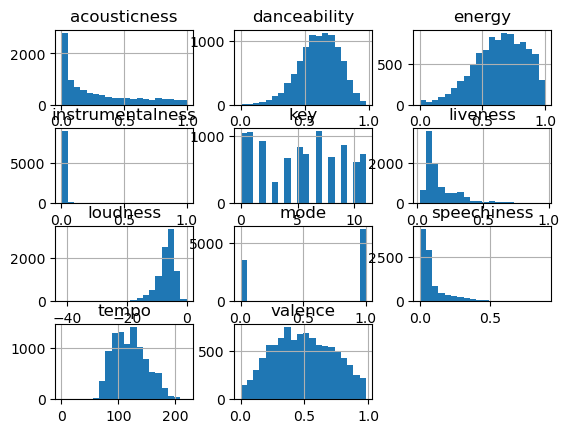

In [30]:
import matplotlib.pyplot as plt

# Plot histograms for each feature
songs.hist(bins=20)
plt.show()

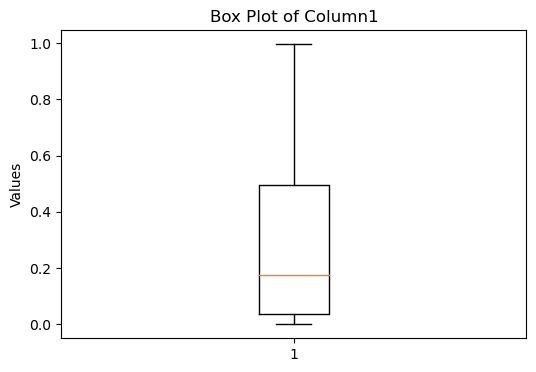

In [31]:
plt.figure(figsize=(6, 4))  # Optional: Set the figure size
plt.boxplot(songs['acousticness'])
plt.title('Box Plot of Column1')
plt.ylabel('Values')
plt.show()


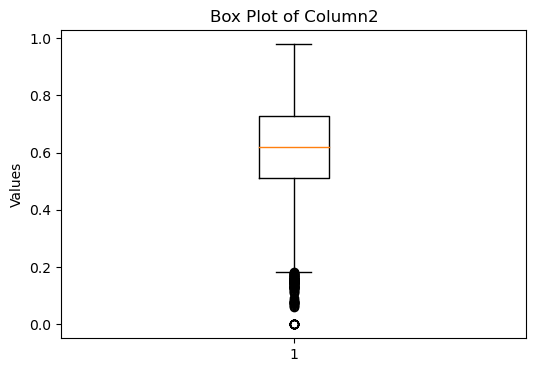

In [32]:
plt.figure(figsize=(6, 4))  # Optional: Set the figure size
plt.boxplot(songs['danceability'])
plt.title('Box Plot of Column2')
plt.ylabel('Values')
plt.show()


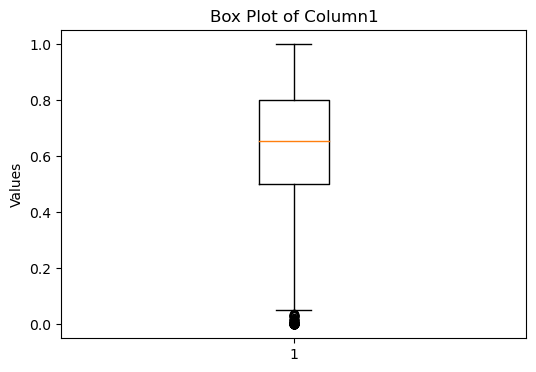

In [33]:
plt.figure(figsize=(6, 4))  # Optional: Set the figure size
plt.boxplot(songs['energy'])
plt.title('Box Plot of Column1')
plt.ylabel('Values')
plt.show()


Diverse Musical Genres: The presence of outliers in various audio features is a natural becuase of a wide range of musical genres. Different genres exhibit distinct musical characteristics, resulting in variations in acousticness, danceability, energy, and other attributes. Thus, outliers are common as they reflect the diversity of musical expressions across genres.


"This data comes from Spotify, a big and trusted music company. So, it's real and reliable."


<h1><b>3. Data Transformation</b></h1>

<h6>Hot Encoding</h6>

In [34]:
# Perform one-hot encoding on the 'artist' column
artist_encoded = pd.get_dummies(songs['artists'])

# Concatenate the one-hot encoded columns with the original DataFrame
songs = pd.concat([songs, artist_encoded], axis=1)

# Drop the original 'artist' column as it's no longer needed
songs = songs.drop('artists', axis=1)




In [35]:
songs.head()

,acousticness,danceability,energy,id,instrumentalness,key,liveness,loudness,mode,name,...,keshi,khai dreams,mike,mxmtoon,potsu,ppcocaine,prxz Shiloh Dynasty,tobi lou,uicideBoy,uicideBoy Pouya
0,0.00239,0.429,0.661,3AJwUDP919kvQ9QcozQPxg,0.000121,11,0.2340,-7.227,1,Yellow,...,0,0,0,0,0,0,0,0,0,0
1,0.14300,0.843,0.806,0I3q5fE6wg7LIfHGngUTnV,0.000000,4,0.0771,-5.946,0,Ms Jackson,...,0,0,0,0,0,0,0,0,0,0
2,0.00958,0.556,0.864,60a0Rd6pjrkxjPbaKzXjfq,0.000000,3,0.2090,-5.870,0,In the End,...,0,0,0,0,0,0,0,0,0,0
3,0.00664,0.545,0.865,6ZOBP3NvffbU4SZcrnt1k6,0.000011,11,0.1680,-5.708,0,Kryptonite,...,0,0,0,0,0,0,0,0,0,0
4,0.03020,0.949,0.661,3yfqSUWxFvZELEM4PmlwIR,0.000000,5,0.0454,-4.244,0,The Real Slim Shady,...,0,0,0,0,0,0,0,0,0,0


In [36]:
new_column_order = ['id'] + [col for col in songs.columns if col != 'id']
songs = songs[new_column_order]
new_column_order = ['name'] + [col for col in songs.columns if col != 'name']
songs = songs[new_column_order]

In [37]:
songs.head()

,name,id,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,...,keshi,khai dreams,mike,mxmtoon,potsu,ppcocaine,prxz Shiloh Dynasty,tobi lou,uicideBoy,uicideBoy Pouya
0,Yellow,3AJwUDP919kvQ9QcozQPxg,0.00239,0.429,0.661,0.000121,11,0.2340,-7.227,1,...,0,0,0,0,0,0,0,0,0,0
1,Ms Jackson,0I3q5fE6wg7LIfHGngUTnV,0.14300,0.843,0.806,0.000000,4,0.0771,-5.946,0,...,0,0,0,0,0,0,0,0,0,0
2,In the End,60a0Rd6pjrkxjPbaKzXjfq,0.00958,0.556,0.864,0.000000,3,0.2090,-5.870,0,...,0,0,0,0,0,0,0,0,0,0
3,Kryptonite,6ZOBP3NvffbU4SZcrnt1k6,0.00664,0.545,0.865,0.000011,11,0.1680,-5.708,0,...,0,0,0,0,0,0,0,0,0,0
4,The Real Slim Shady,3yfqSUWxFvZELEM4PmlwIR,0.03020,0.949,0.661,0.000000,5,0.0454,-4.244,0,...,0,0,0,0,0,0,0,0,0,0


<h1><b>4. Standardization</b></h1>

In [38]:
from sklearn.preprocessing import MinMaxScaler
# Separate the first column (e.g., 'id') from the rest
first_column = songs.iloc[:,0:2]
rest_of_columns = songs.iloc[:, 2:]
# Assuming 'rest_of_columns' is your DataFrame with columns to be normalized

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the data to range [0, 1]
normalized_data = scaler.fit_transform(rest_of_columns)

# Create a new DataFrame with the normalized values
normalized_df = pd.DataFrame(normalized_data, columns=rest_of_columns.columns)


# Combine the first column and the standardized data
result_df = pd.concat([first_column, normalized_df ], axis=1)

In [39]:
scaler = StandardScaler()
# Standardize all numerical columns in the DataFrame
genres_scaled = pd.DataFrame(scaler.fit_transform(genres), columns=genres.columns)
genres_scaled.head()


,mode,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,0.447484,1.808197,-2.484719,-0.966000,-2.089283,1.479575,1.828029,-3.912689,-0.534628,-2.500950,-1.927609,-0.721720,0.018179
1,0.447484,0.292578,-1.578931,8.423062,-0.471170,0.996674,-0.669260,-1.181781,-0.084146,0.072537,-1.342996,0.751277,-0.278774
2,0.447484,1.128407,1.160449,-1.442757,1.095589,2.486616,-0.723408,0.247722,-0.454680,0.825894,2.389920,0.482555,0.315131
3,0.447484,0.782518,-0.053735,-0.199068,-0.605666,-0.022662,0.280445,-0.331412,0.301775,-0.352759,0.103360,-1.138147,0.315131
4,0.447484,0.861153,0.011776,-0.645517,-1.043772,-0.779555,-0.222497,-0.366883,-0.009152,-0.395526,-0.220526,0.352378,0.315131


In [40]:
result_df.head()

,name,id,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,...,keshi,khai dreams,mike,mxmtoon,potsu,ppcocaine,prxz Shiloh Dynasty,tobi lou,uicideBoy,uicideBoy Pouya
0,Yellow,3AJwUDP919kvQ9QcozQPxg,0.002400,0.438202,0.661655,0.000121,1.000000,0.225603,0.826905,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Ms Jackson,0I3q5fE6wg7LIfHGngUTnV,0.143574,0.861083,0.806803,0.000000,0.363636,0.060965,0.857574,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,In the End,60a0Rd6pjrkxjPbaKzXjfq,0.009618,0.567926,0.864862,0.000000,0.272727,0.199370,0.859393,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Kryptonite,6ZOBP3NvffbU4SZcrnt1k6,0.006667,0.556691,0.865863,0.000011,1.000000,0.156348,0.863272,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,The Real Slim Shady,3yfqSUWxFvZELEM4PmlwIR,0.030321,0.969356,0.661655,0.000000,0.454545,0.027702,0.898322,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [41]:
result_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9590 entries, 0 to 9589
Columns: 1009 entries, name to uicideBoy Pouya
dtypes: float64(1007), object(2)
memory usage: 73.8+ MB


In [42]:
result_df.describe()

,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,...,keshi,khai dreams,mike,mxmtoon,potsu,ppcocaine,prxz Shiloh Dynasty,tobi lou,uicideBoy,uicideBoy Pouya
count,9590.000000,9590.000000,9590.000000,9590.000000,9590.000000,9590.000000,9590.000000,9590.000000,9590.000000,9590.000000,...,9590.000000,9590.000000,9590.000000,9590.000000,9590.000000,9590.000000,9590.000000,9590.000000,9590.000000,9590.000000
mean,0.289670,0.624588,0.637265,0.031280,0.476870,0.170994,0.832972,0.637956,0.100669,0.547842,...,0.000730,0.000626,0.000313,0.000313,0.000417,0.000313,0.000313,0.000417,0.003545,0.000313
std,0.294169,0.161903,0.205428,0.140813,0.321726,0.150444,0.088499,0.480616,0.106320,0.134251,...,0.027009,0.025007,0.017685,0.017685,0.020420,0.017685,0.017685,0.020420,0.059440,0.017685
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.036170,0.520940,0.499489,0.000000,0.181818,0.081217,0.803898,0.000000,0.039374,0.440768,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.175703,0.634321,0.655649,0.000002,0.454545,0.108080,0.850212,1.000000,0.056376,0.545152,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.498996,0.743616,0.799796,0.000191,0.727273,0.216946,0.884412,1.000000,0.109004,0.636223,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<h1><b>DATA VALIDITY</b></h1>

In [43]:
result_df.rename(columns={'[\'Joey Bada$$\']': 'Joey BadaSS'}, inplace=True)
result_df.to_csv("Songs_scaled.csv")
genres_scaled.to_csv("Genres_scaled.csv")

In [44]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
from collections import defaultdict

sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id='0a9d93a89341414fa53a9f3efaf9ec77',
                                                           client_secret='4a464b6a9a3444f98bdcf1922bcc899d'))

# Search for Atif Aslam songs
artist_name = 'Atif Aslam'
results = sp.search(q=artist_name, type='track', limit=10)

# Display the results
print("Results for Atif Aslam songs:")
for idx, track in enumerate(results['tracks']['items']):
    track_id = track['id']
    track_name = track['name']
    track_year = track['album']['release_date'][:4]  # Extracting the year from the release date
    print(f"{idx + 1}. {track_name} - {track_year}, ID: {track_id}")

def find_song(name, year):
    song_data = defaultdict()
    results = sp.search(q= 'track: {} year: {}'.format(name,year), limit=1)
    if results['tracks']['items'] == []:
        return None

    print(results)
    results = results['tracks']['items'][0]
    track_id = results['id']
    audio_features = sp.audio_features(track_id)[0]

    song_data['name'] = [name]
    song_data['year'] = [year]
    song_data['explicit'] = [int(results['explicit'])]
    song_data['duration_ms'] = [results['duration_ms']]
    song_data['popularity'] = [results['popularity']]

    for key, value in audio_features.items():
        song_data[key] = value

    return pd.DataFrame(song_data)

Results for Atif Aslam songs:
1. Dil Diyan Gallan - 2017, ID: 5MnAi6ZF7cE8pAz7wYr9Ta
2. Atif Aslam Songs Mashup - 2023, ID: 4YCnEz3m88FUHeZtsPbE4n
3. Tera Hone Laga Hoon - 2023, ID: 48Ix6ReYdJf2H4mKb3TIpj
4. Dil Diyan Gallan - 2021, ID: 0FBQ4NrrHUbR9kus7rzrOj
5. Atif Aslam Mashup - Cover Mashup - 2020, ID: 0EkX4heaF3USfcCQCWidAU
6. Pehli Nazar Mein - 2023, ID: 5llaVhaIoowKT3fqf2NfPO
7. Tu Jaane Na - 2023, ID: 5vGiuYFSGekGLgbxhV1rD5
8. O Saathi - 2018, ID: 6fScgF2Y63ScU73nYju0ny
9. Pehli Dafa - 2017, ID: 4Tkb7zsDmsawB7S5TpKQV1
10. Tera Hone Laga Hoon - 2009, ID: 0dLbrlAVPPjpPqnYfmJsWk


In [45]:
!pip install spotipy

Defaulting to user installation because normal site-packages is not writeable


In [46]:
import pandas as pd

def retrieve_ids(song_list,NAMES):
  
    ids = []

    # Assuming 'NAMES' is your DataFrame containing 'Names' and 'id' columns
    for x in song_list:
        print(x)

        result = NAMES[NAMES['Names'].str.contains(str(x), case=False, na=False)]

        if not result.empty:
            # Retrieve 'id' value at the index of the first occurrence
            first_index = result.index[0]
            first_id = result.loc[first_index, 'id']
            ids.append(first_id)


    return ids


In [47]:

Songs = [
         "Naach Meri Rani","Surma Surma","Ban Ja Rani","Suit Suit"]
Ratings = [9,9,9,9]  
Ids = retrieve_ids(Songs,NAMES)

print(Ids)






Naach Meri Rani
Surma Surma
Ban Ja Rani
Suit Suit
['1orM67pmkNc4alrZkWjYkV', '77riTlvCLV3K8O0glNiQ8B', '7cQtGVoPCK9DlspeYjdHOA', '2mwBSO58y92EYmEFpDfmS7']


In [442]:
print(Ids)
weighted_row = np.zeros(1006)
for x in range(len(Ids)) :
    # Find the row corresponding to the ID in result_df
    print(x)
    row = result_df[result_df['id'] == Ids[x]]
    row =row.iloc[0]
    row = np.array(row.values[1:]) 
   
    # Multiply the row with the corresponding rating
    weighted_row = weighted_row + row * Ratings[x]

    
    print(weighted_row)
    
User_Profile = np.array(weighted_row / np.sum(weighted_row))
print(User_Profile)


['1orM67pmkNc4alrZkWjYkV', '77riTlvCLV3K8O0glNiQ8B', '7cQtGVoPCK9DlspeYjdHOA', '2mwBSO58y92EYmEFpDfmS7']
0
[0.5539156626506024 6.2145045965270675 4.396302847795605 ... 0.0 0.0 0.0]
1
[2.8852409638554217 12.96220633299285 12.585475560714595 ... 0.0 0.0 0.0]
2
[4.746686746987952 20.436159346271705 18.819653592560485 ... 0.0 0.0 0.0]
3
[6.011746987951808 27.487231869254337 26.648458622332363 ... 0.0 0.0 0.0]
[0.030267550077961326 0.1383909151157809 0.13416791449613663 ... 0.0 0.0
 0.0]


In [443]:
Matrix  =  result_df.iloc[:,1:]
User_Profile = User_Profile.reshape(1,-1)
Utility  = Matrix * User_Profile
Sum_vector = np.sum(Utility, axis=1)
R = result_df
R['Sum_vector'] = Sum_vector
R

,id,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,...,['jxdn'],['keshi'],['khai dreams'],['mike.'],['mxmtoon'],['potsu'],['ppcocaine'],"['prxz', 'Shiloh Dynasty']",['tobi lou'],Sum_vector
982,1ExfPZEiahqhLyajhybFeS,0.333333,0.753830,0.804801,0.000000,1.000000,0.272823,0.907731,1.0,0.069463,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.669384
7743,7BjQd0sfYsMGVrTpRdBNTT,0.331325,0.835546,0.930930,0.000000,1.000000,0.670514,0.928536,1.0,0.276286,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.679111
8910,7BjQd0sfYsMGVrTpRdBNTT,0.331325,0.835546,0.930930,0.000000,1.000000,0.670514,0.928536,1.0,0.276286,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.679111
7975,5FihcmME7NlwW8KbYOaHVH,0.331325,0.835546,0.930930,0.000000,1.000000,0.670514,0.928536,1.0,0.276286,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.679111
8088,07Ru4OBbsuzRzQmtQMjlHE,0.104418,0.907048,0.947947,0.000209,0.727273,0.121721,0.969236,1.0,0.059508,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.661976
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5494,2e6fCxto7NzsnujvliBtEk,0.916667,0.000000,0.000144,0.910000,0.909091,0.142707,0.252460,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.153840
1837,65rkHetZXO6DQmBh3C2YtW,0.926707,0.000000,0.000030,0.297000,0.909091,0.095488,0.225335,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.148819
2719,7K7E7LKK51PezScgsvVg9Y,0.996988,0.131767,0.003744,0.382000,0.272727,0.061280,0.000000,0.0,0.042394,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.133528
7219,03sJaTenPLeRaVUISW6pI5,0.421687,0.000000,0.001701,0.399000,0.363636,0.095488,0.333214,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.101819


In [447]:
result_df = result_df.sort_values(by='Sum_vector', ascending=False)
result_df

f = result_df.iloc[:200,]
print(result_df.iloc[:200,])

                          id  acousticness  danceability    energy  \
8236  2Wu9PNpLUCBl3W1GaPqkhl      0.178715      0.833504  0.922921   
8271  5MazfUPG7UH6j2H8sKCrew      0.342369      0.736466  0.890889   
8240  77riTlvCLV3K8O0glNiQ8B      0.259036      0.749745  0.909908   
8246  6mRo3bUv6HkaZ5CprZEz1B      0.094378      0.591420  0.724719   
8253  6fzzFUK6M1PxIbPMNQl5Ak      0.029418      0.843718  0.725720   
...                      ...           ...           ...       ...   
3725  58rgceeiYu1wFneDP2j5LJ      0.526104      0.755873  0.849847   
1977  698eQRku24PIYPQPHItKlA      0.029317      0.544433  0.907906   
6243  3bR6JvYSnJlzNlyUZbFMWJ      0.026004      0.671093  0.899898   
2412  45IOnEpVUdxWUZFqpZ7Xvz      0.188755      0.863126  0.906905   
8172  37aKP6aLLzMSVgtIIvMNz4      0.614458      0.715015  0.897896   

      instrumentalness       key  liveness  loudness  mode  speechiness  ...  \
8236          0.000000  1.000000  0.371459  0.928990   0.0     0.166667  ...   

In [418]:
import numpy as np

# Assuming 'matrix' is your matrix and 'row' is the row vector you want to multiply
matrix = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])  # Example matrix
row = np.array([0.5, 0.5, 0.5])  # Example row vector

# Reshape the row vector to ensure it has the same shape as the matrix rows
row = row.reshape(1, -1)

# Multiply the matrix by the row vector using broadcasting
result = matrix * row

print("Result:")
print(result)

Result:
[[0.5 1.  1.5]
 [2.  2.5 3. ]
 [3.5 4.  4.5]]


In [440]:
result_df = result_df.drop('Sum_vector', axis=1)
